In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 inter_bin_distance_penalty=0.0,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=range(2,21),
                 n_init_bins_list=[5,10,15,20,30])

In [4]:
# print('#Numerical Vars =', len(var_dict['numerical_vars']))
# print('#Categorical Vars =', len(var_dict['categorical_vars']))
# print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

In [5]:
%time clustering_scores = exp.test_clustering_performance()

KeyboardInterrupt: 

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [ ]:
exp.semantic_binning.bins_by_var

In [ ]:
exp.semantic_binning.visualize_bin_embeddings()

### (1) 다른 데이터셋?

### (3) 정성 평가?

### (2) 수렴하면 중도에 멈추도록 하고 싶은데, 체크할 방법?

In [6]:
from data_handler import DataHandler
from semantic_binning import SemanticBinning
handler = DataHandler(exp.data, exp.var_dict)

In [7]:
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=20, lr=0.001, weight_decay=0.0,
                     inter_bin_distance_penalty=0.05, verbose=True)

In [8]:
sb.fit(exp.data, n_init_bins=30)

>>> Epoch = 1, Loss = 1.018519639968872
[25, 19, 20, 3, 4]
>>> Epoch = 2, Loss = 0.8449902534484863
[21, 22, 23, 3, 3]
>>> Epoch = 3, Loss = 0.6995885372161865
[24, 16, 8, 3, 4]
>>> Epoch = 4, Loss = 0.5891582369804382
[21, 16, 8, 3, 2]
>>> Epoch = 5, Loss = 0.5125799179077148
[16, 9, 8, 3, 2]
>>> Epoch = 6, Loss = 0.453125923871994
[16, 7, 6, 3, 2]
>>> Epoch = 7, Loss = 0.4097117781639099
[16, 6, 19, 3, 2]
>>> Epoch = 8, Loss = 0.3711712062358856
[15, 6, 17, 3, 2]
>>> Epoch = 9, Loss = 0.3401995003223419
[14, 20, 17, 3, 2]
>>> Epoch = 10, Loss = 0.31329119205474854
[15, 18, 18, 3, 2]
>>> Epoch = 11, Loss = 0.2937505841255188
[18, 18, 17, 3, 2]
>>> Epoch = 12, Loss = 0.27679604291915894
[17, 19, 9, 2, 2]
>>> Epoch = 13, Loss = 0.2609136998653412
[18, 18, 11, 2, 2]
>>> Epoch = 14, Loss = 0.24731296300888062
[5, 19, 12, 2, 2]
>>> Epoch = 15, Loss = 0.23579446971416473
[13, 16, 11, 2, 2]
>>> Epoch = 16, Loss = 0.22635793685913086
[13, 13, 11, 2, 2]
>>> Epoch = 17, Loss = 0.219672530889511

In [9]:
sb.bins_by_var['satisfaction_level']['bins']

['(0.089, 0.37]',
 '(0.37, 0.43]',
 '(0.43, 0.62]',
 '(0.62, 0.7]',
 '(0.7, 0.85]',
 '(0.85, 1.0]']

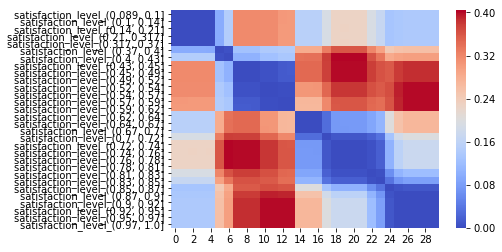

In [10]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

In [11]:
sb.bins_by_var['last_evaluation']['bins']

['(0.359, 0.48]',
 '(0.48, 0.52]',
 '(0.52, 0.55]',
 '(0.55, 0.59]',
 '(0.59, 0.61]',
 '(0.61, 0.7]',
 '(0.7, 0.76]',
 '(0.76, 0.82]',
 '(0.82, 0.86]',
 '(0.86, 0.89]',
 '(0.89, 1.0]']

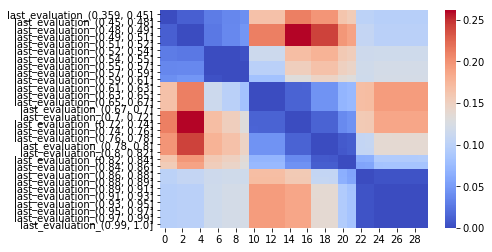

In [12]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

In [13]:
sb.bins_by_var['average_montly_hours']['bins']

['(95.999, 133.0]',
 '(133.0, 146.0]',
 '(146.0, 154.0]',
 '(154.0, 162.0]',
 '(162.0, 174.267]',
 '(174.267, 207.0]',
 '(207.0, 232.0]',
 '(232.0, 253.0]',
 '(253.0, 262.0]',
 '(262.0, 267.0]',
 '(267.0, 310.0]']

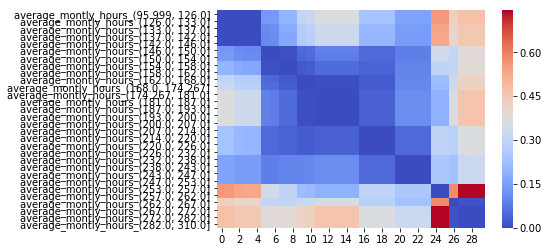

In [14]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

In [15]:
sb.bins_by_var['number_project']['bins']

['(1.999, 4.0]', '(4.0, 7.0]']

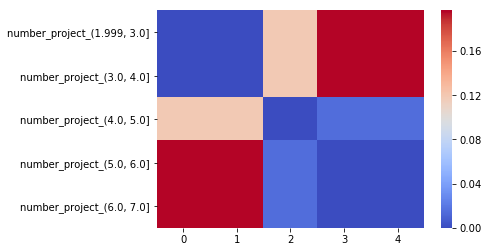

In [16]:
sb.plot_pairwise_distance_between_bins('number_project')

In [17]:
sb.bins_by_var['time_spend_company']['bins']

['(1.999, 6.0]', '(6.0, 10.0]']

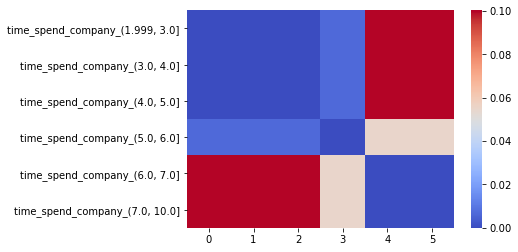

In [18]:
sb.plot_pairwise_distance_between_bins('time_spend_company')